In [1]:
import os
import pandas as pd
#from glob import glob

In [3]:
base_dir = "pmdata/"
participants = [f"p{str(i).zfill(2)}" for i in range(1, 17)] # Assuming 16 participants: p1 to p16

# Initialize empty list
all_sleep_data = []
all_wellness_data = []
all_slp_score = []

In [5]:

# Loop through each participant folder
for participant in participants:
    fitbit_path = os.path.join(base_dir, participant, "fitbit")
    pmsys_path = os.path.join(base_dir, participant, "pmsys")

    # Load sleep data
    sleep_file = os.path.join(fitbit_path, "sleep.json")
    if os.path.exists(sleep_file):
        sleep_df = pd.read_json(sleep_file)
        sleep_df["participant_id"] = participant 
        sleep_df["duration"] = sleep_df["duration"] / 60000 
        all_sleep_data.append(sleep_df)
  
        # Load sleep score data
    slp_score_file = os.path.join(fitbit_path, "sleep_score.csv")
    if os.path.exists(slp_score_file):
        slp_score_df = pd.read_csv(slp_score_file)
        slp_score_df["participant_id"] = participant 
        all_slp_score.append(slp_score_df)
    
    # Load wellness data
    wellness_file = os.path.join(pmsys_path, "wellness.csv")
    if os.path.exists(wellness_file):
        wellness_df = pd.read_csv(wellness_file)
        wellness_df["participant_id"] = participant
        all_wellness_data.append(wellness_df)


In [4]:
# Combine all participant data into DataFrames
sleep_data = pd.concat(all_sleep_data, ignore_index=True) if all_sleep_data else pd.DataFrame()
wellness_data = pd.concat(all_wellness_data, ignore_index=True) if all_wellness_data else pd.DataFrame()
slp_score_data = pd.concat(all_slp_score, ignore_index=True) if all_slp_score else pd.DataFrame()

#change datetime to same format in "date"
wellness_data["effective_time_frame"] = pd.to_datetime(wellness_data["effective_time_frame"])
wellness_data["date"] = wellness_data["effective_time_frame"].dt.strftime('%Y-%m-%d')
print(wellness_data[["date"]].head())

sleep_data["dateOfSleep"] = pd.to_datetime(sleep_data["dateOfSleep"])
sleep_data["date"] = sleep_data["dateOfSleep"].dt.strftime('%Y-%m-%d')
print(sleep_data[["date"]].head())

slp_score_data["timestamp"] = pd.to_datetime(slp_score_data["timestamp"])
slp_score_data["date"] = slp_score_data["timestamp"].dt.strftime('%Y-%m-%d')
print(slp_score_data[["date"]].head())

print("Data extraction complete!")
sleep_data.to_csv('sleep_data.csv', index=False)  
wellness_data.to_csv('wellness_data.csv', index=False)  
slp_score_data.to_csv('slp_score_data.csv', index=False)  
print(f"Sleep Data: {sleep_data.shape}")
print(f"Wellness Data: {wellness_data.shape}")
print(f"Sleep Score Data: {slp_score_data.shape}")

         date
0  2019-11-01
1  2019-11-02
2  2019-11-03
3  2019-11-04
4  2019-11-05
         date
0  2019-11-02
1  2019-11-03
2  2019-11-04
3  2019-11-05
4  2019-11-06
         date
0  2019-11-01
1  2019-11-02
2  2019-11-03
3  2019-11-04
4  2019-11-05
Data extraction complete!
Sleep Data: (2064, 17)
Wellness Data: (1747, 11)
Sleep Score Data: (1836, 11)


In [5]:
slp_score_data

,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,participant_id,date
0,2019-11-01 06:29:30+00:00,24472394143,76,18,20,38,27,53,0.053635,p01,2019-11-01
1,2019-11-02 07:19:30+00:00,24486013387,79,20,22,37,36,53,0.078978,p01,2019-11-02
2,2019-11-03 07:34:30+00:00,24497341340,71,16,17,38,38,52,0.093491,p01,2019-11-03
3,2019-11-04 06:35:00+00:00,24507914069,68,15,15,38,37,53,0.064851,p01,2019-11-04
4,2019-11-05 06:25:00+00:00,24521896102,73,15,22,36,26,54,0.093185,p01,2019-11-05
...,...,...,...,...,...,...,...,...,...,...,...
1831,2020-03-26 11:58:00+00:00,26483120825,68,17,20,31,62,67,0.085169,p16,2020-03-26
1832,2020-03-27 12:19:30+00:00,26495767462,86,24,20,42,134,69,0.110676,p16,2020-03-27
1833,2020-03-28 12:39:00+00:00,26507885399,83,21,22,40,82,68,0.089924,p16,2020-03-28
1834,2020-03-29 13:43:00+00:00,26519603409,83,20,23,40,96,68,0.093137,p16,2020-03-29


In [6]:
sleep_data

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep,participant_id,date
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,430.0,0,378,52,0,430,97,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 3...",True,p01,2019-11-02
1,24497341340,2019-11-03,2019-11-03 00:32:00,2019-11-03T07:34:30.000,422.0,0,378,44,0,422,96,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 3...",True,p01,2019-11-03
2,24507914069,2019-11-04,2019-11-03 23:55:30,2019-11-04T06:35:00.000,399.0,0,361,38,0,399,96,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 3...",True,p01,2019-11-04
3,24521896102,2019-11-05,2019-11-05 00:22:30,2019-11-05T06:25:00.000,362.0,0,326,36,1,362,99,stages,0,"{'summary': {'deep': {'count': 1, 'minutes': 2...",True,p01,2019-11-05
4,24534036899,2019-11-06,2019-11-06 00:25:30,2019-11-06T06:29:30.000,364.0,0,341,23,1,364,99,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 6...",True,p01,2019-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,26495767462,2020-03-27,2020-03-27 03:43:00,2020-03-27T12:19:30.000,516.0,0,469,47,0,516,92,stages,0,"{'summary': {'deep': {'count': 9, 'minutes': 1...",True,p16,2020-03-27
2060,26507885399,2020-03-28,2020-03-28 04:50:30,2020-03-28T12:39:00.000,468.0,0,419,49,4,468,95,stages,0,"{'summary': {'deep': {'count': 6, 'minutes': 8...",True,p16,2020-03-28
2061,26519603409,2020-03-29,2020-03-29 05:02:30,2020-03-29T13:43:00.000,520.0,0,442,78,10,520,96,stages,0,"{'summary': {'deep': {'count': 6, 'minutes': 9...",True,p16,2020-03-29
2062,26532874137,2020-03-30,2020-03-30 04:58:00,2020-03-30T14:02:00.000,544.0,0,485,59,1,544,94,stages,0,"{'summary': {'deep': {'count': 9, 'minutes': 1...",True,p16,2020-03-30


In [7]:
wellness_data

,effective_time_frame,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,soreness_area,stress,participant_id,date
0,2019-11-01 08:31:40.751000+00:00,2,3,5,6,3,2,[12921003],3,p01,2019-11-01
1,2019-11-02 10:00:01.229000+00:00,2,3,6,6,3,2,[12921003],3,p01,2019-11-02
2,2019-11-03 14:28:03.263000+00:00,3,3,8,6,3,3,[],3,p01,2019-11-03
3,2019-11-04 07:05:28.429000+00:00,3,3,8,6,3,3,[],3,p01,2019-11-04
4,2019-11-05 06:13:35.998000+00:00,3,3,8,5,3,3,[],3,p01,2019-11-05
...,...,...,...,...,...,...,...,...,...,...,...
1742,2020-03-08 11:44:44.398000+00:00,3,3,4,6,2,3,[],3,p16,2020-03-08
1743,2020-03-11 11:33:15.168000+00:00,2,3,4,6,2,3,[],2,p16,2020-03-11
1744,2020-03-15 08:33:15.985000+00:00,4,4,4,10,4,4,[],4,p16,2020-03-15
1745,2020-03-17 09:54:27.989000+00:00,2,3,4,5,3,3,[],3,p16,2020-03-17


In [8]:
# Show basic info
print("Sleep Data Overview:")
print(sleep_data.info())
print("\nWellness Data Overview:")
print(wellness_data.info())
print("\nSleep Score Data Overview:")
print(slp_score_data.info())

Sleep Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   logId                2064 non-null   int64         
 1   dateOfSleep          2064 non-null   datetime64[ns]
 2   startTime            2064 non-null   object        
 3   endTime              2064 non-null   object        
 4   duration             2064 non-null   float64       
 5   minutesToFallAsleep  2064 non-null   int64         
 6   minutesAsleep        2064 non-null   int64         
 7   minutesAwake         2064 non-null   int64         
 8   minutesAfterWakeup   2064 non-null   int64         
 9   timeInBed            2064 non-null   int64         
 10  efficiency           2064 non-null   int64         
 11  type                 2064 non-null   object        
 12  infoCode             2064 non-null   int64         
 13  levels      

In [9]:
print("Sleep Data Summary:")
print(sleep_data.describe())

print("\nWellness Data Summary:")
print(wellness_data.describe())

print("\nSleep score Data Summary:")
print(slp_score_data.describe())

Sleep Data Summary:
              logId     duration  minutesToFallAsleep  minutesAsleep  \
count  2.064000e+03  2064.000000          2064.000000    2064.000000   
mean   2.547562e+10   444.038275             0.036337     387.182171   
std    5.864598e+08   131.210291             0.889502     111.897713   
min    2.447235e+10    60.000000             0.000000      39.000000   
25%    2.496629e+10   396.000000             0.000000     348.000000   
50%    2.543027e+10   461.500000             0.000000     401.000000   
75%    2.596442e+10   518.000000             0.000000     453.000000   
max    2.655419e+10   953.000000            35.000000     823.000000   

       minutesAwake  minutesAfterWakeup    timeInBed   efficiency     infoCode  
count   2064.000000         2064.000000  2064.000000  2064.000000  2064.000000  
mean      56.526647            0.744671   444.038275    94.335271     0.140504  
std       25.232016            2.085014   131.210291     4.588759     0.506503  
min    

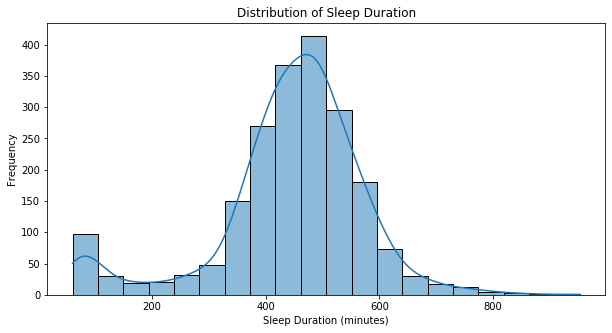

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(sleep_data["duration"], bins=20, kde=True)
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

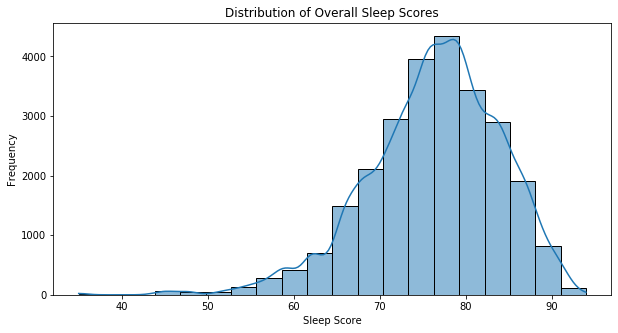

In [11]:
merged_sleep_score_data = pd.merge(sleep_data, slp_score_data, on="date", how="inner")

plt.figure(figsize=(10, 5))
sns.histplot(merged_sleep_score_data['overall_score'], bins=20, kde=True)
plt.title("Distribution of Overall Sleep Scores")
plt.xlabel("Sleep Score")
plt.ylabel("Frequency")
plt.show()

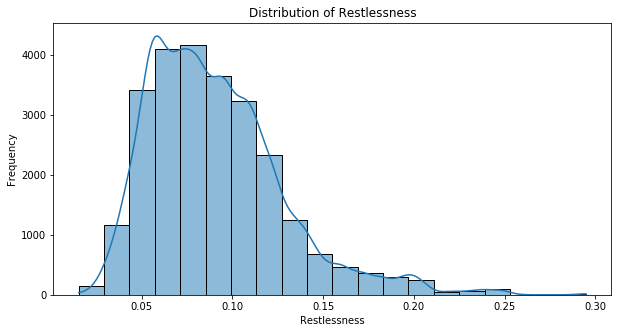

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_sleep_score_data['restlessness'], bins=20, kde=True)
plt.title("Distribution of Restlessness")
plt.xlabel("Restlessness")
plt.ylabel("Frequency")
plt.show()

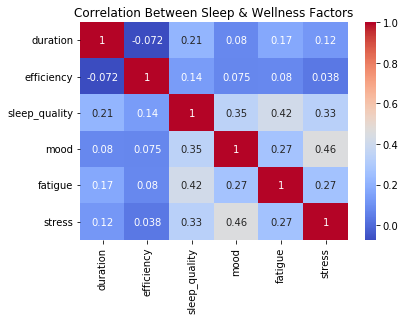

In [13]:
#sleep_data.rename(columns={"dateOfSleep": "date"}, inplace=True)
#wellness_data.rename(columns={"effective_time_frame": "date"}, inplace=True)
merged_df = pd.merge(sleep_data, wellness_data, on=["participant_id", "date"], how="inner")

correlation_matrix = merged_df[["duration", "efficiency", "sleep_quality", "mood", "fatigue", "stress"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Sleep & Wellness Factors")
plt.show()

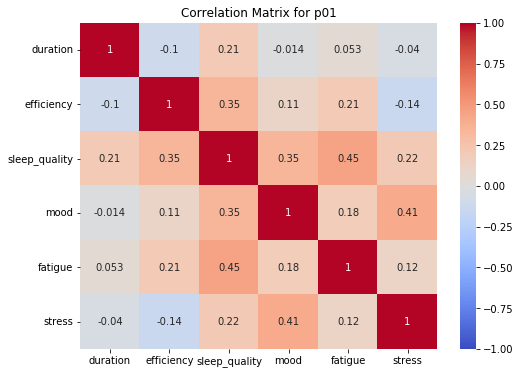

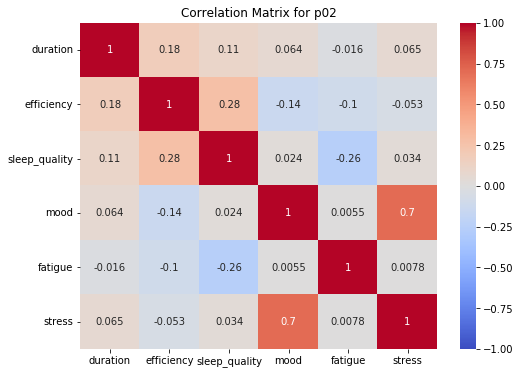

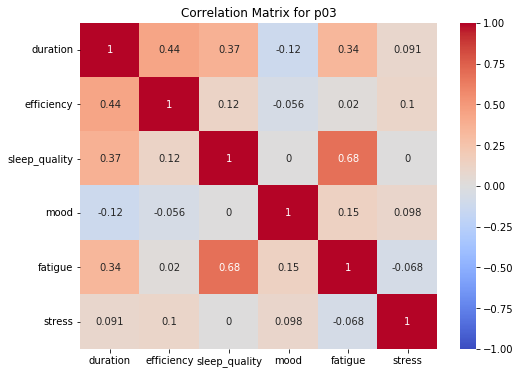

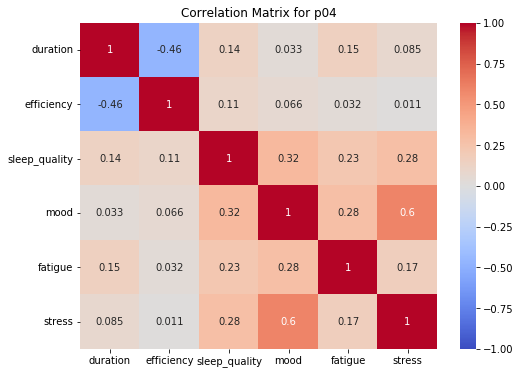

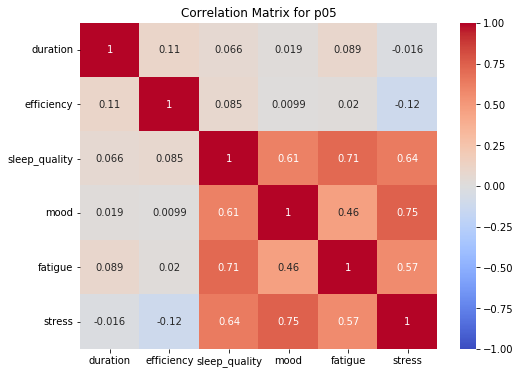

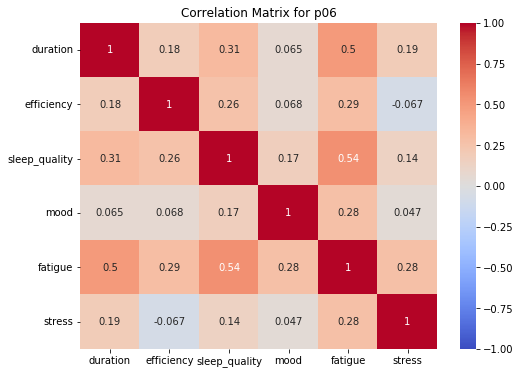

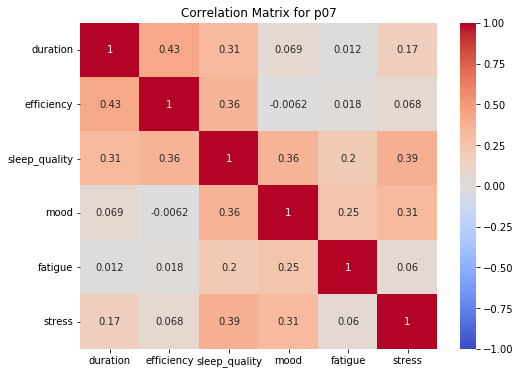

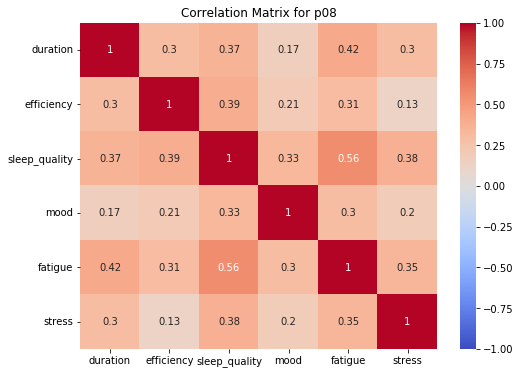

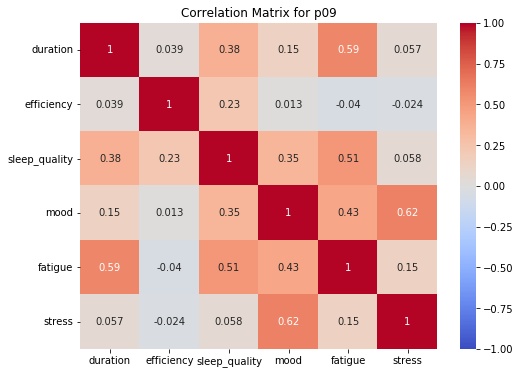

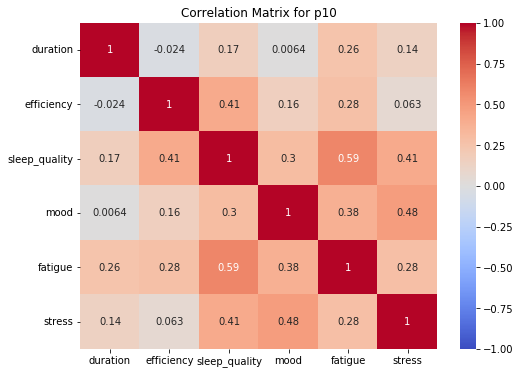

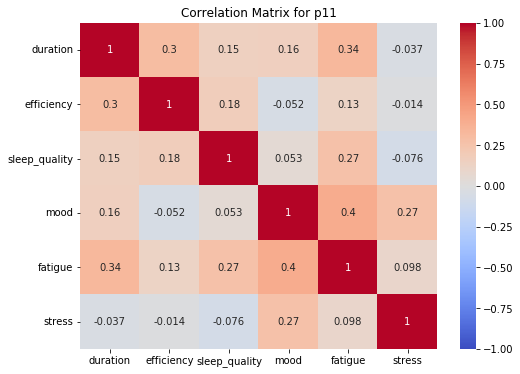

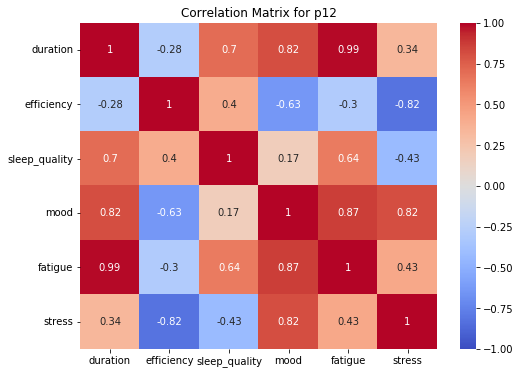

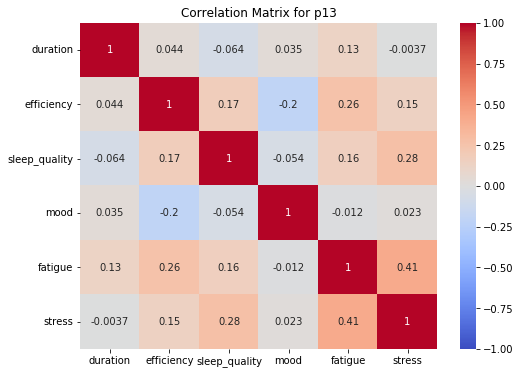

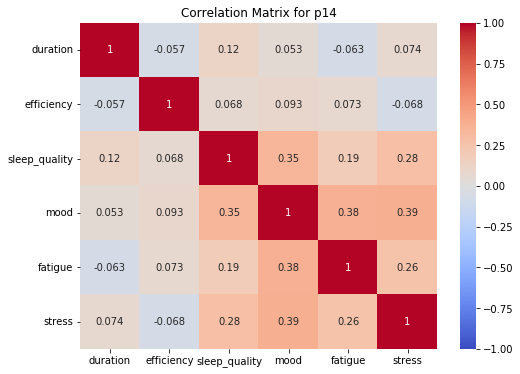

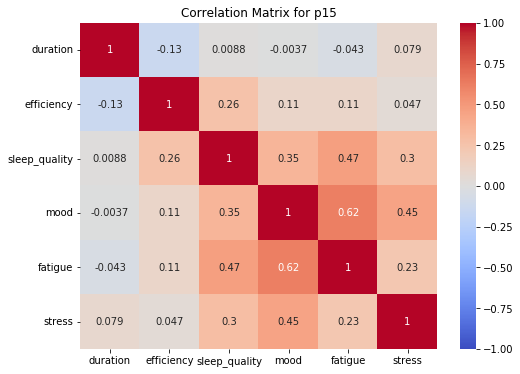

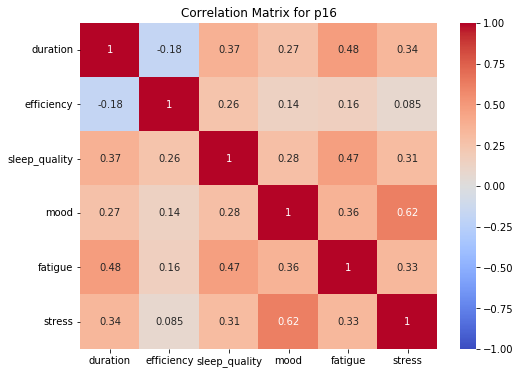

In [14]:
for participant in participants:
    # Filter data for the current participant
    participant_data = merged_df[merged_df['participant_id'] == participant]

    # Compute correlation matrix for relevant columns
    correlation_matrix = participant_data[["duration", "efficiency", "sleep_quality", "mood", "fatigue", "stress"]].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix for {participant}")
    plt.show()

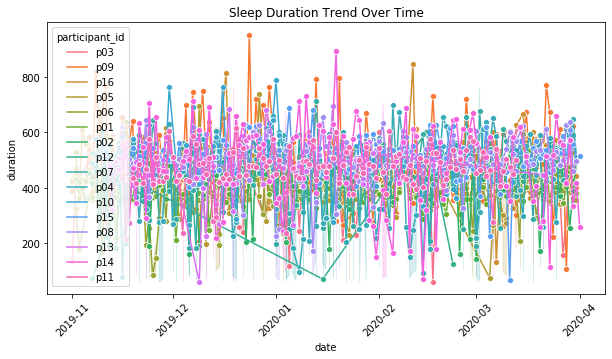

In [15]:
    # Sort the data by date
    sleep_data["date"] = pd.to_datetime(sleep_data["date"])
    sleep_data.sort_values(by=["date"], inplace=True)

    # Plot sleep duration over time
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=sleep_data, x="date", y="duration", marker="o", hue = sleep_data['participant_id'] )
    plt.title(f"Sleep Duration Trend Over Time")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


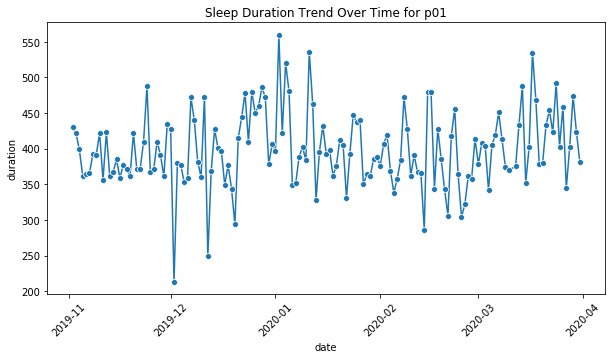

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


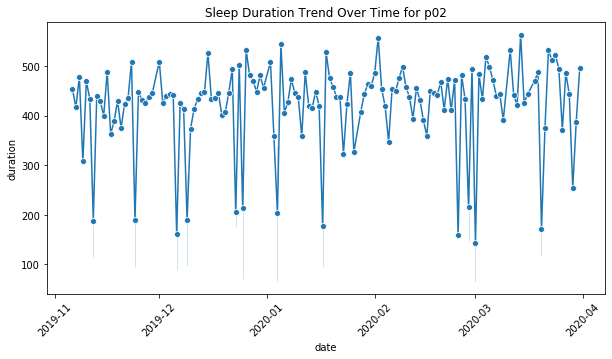

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


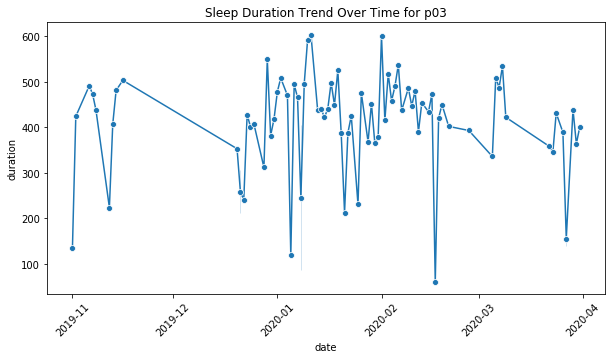

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


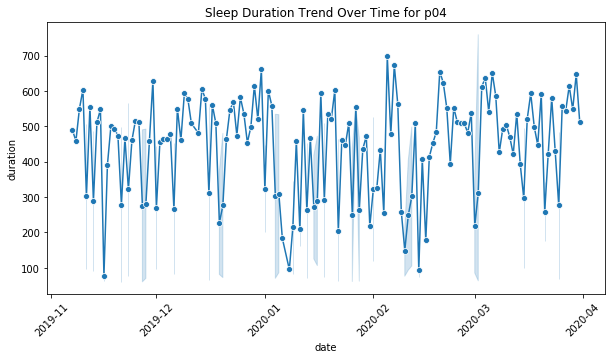

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


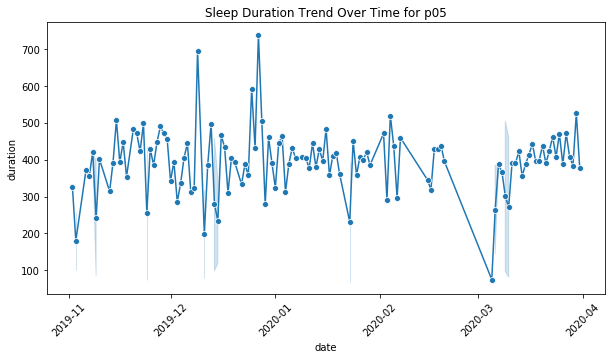

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


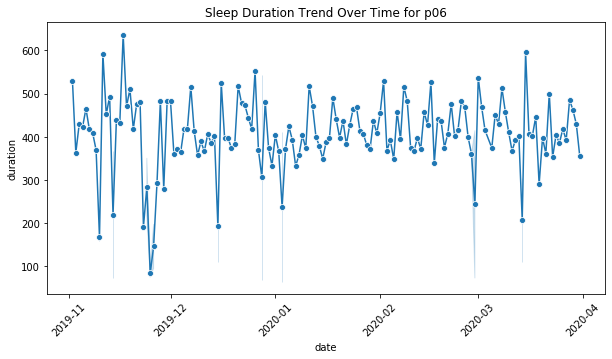

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


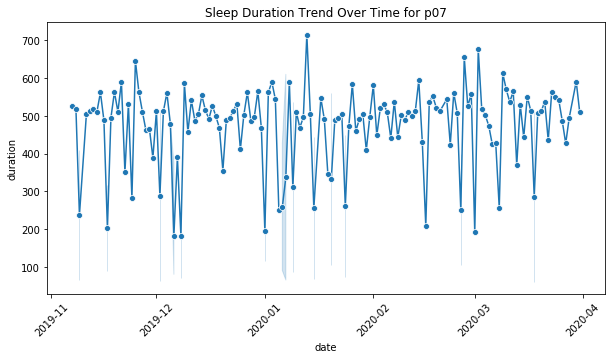

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


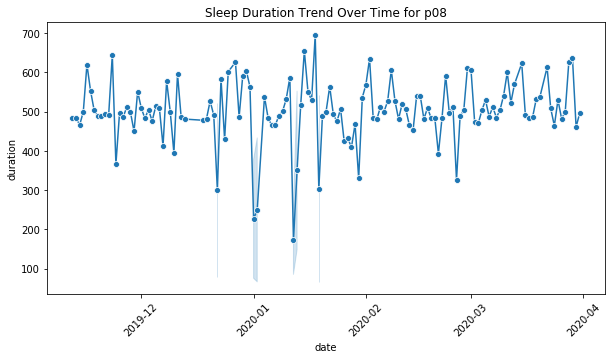

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


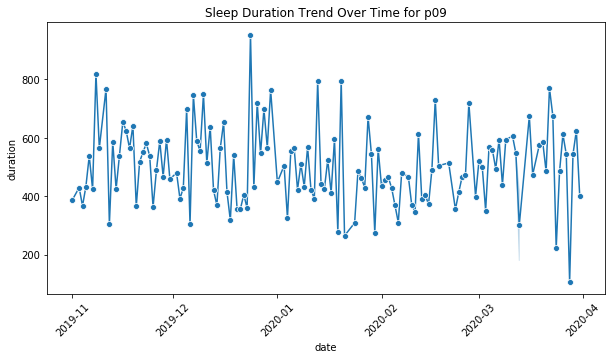

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


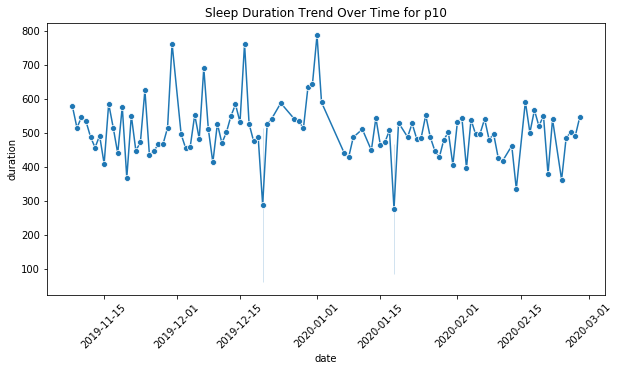

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


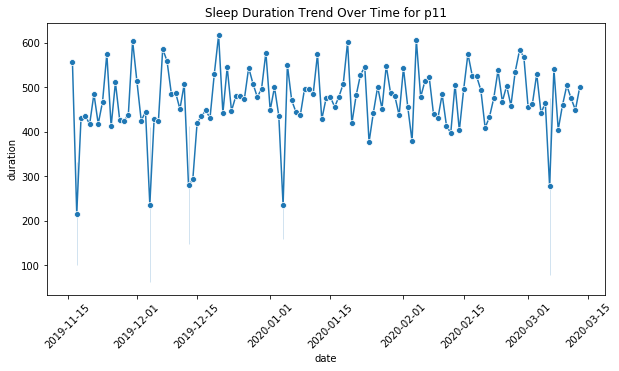

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


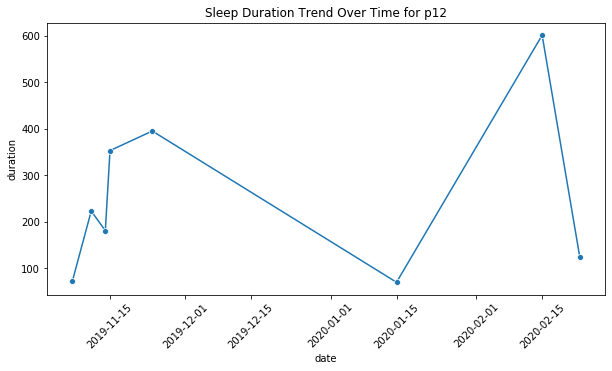

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


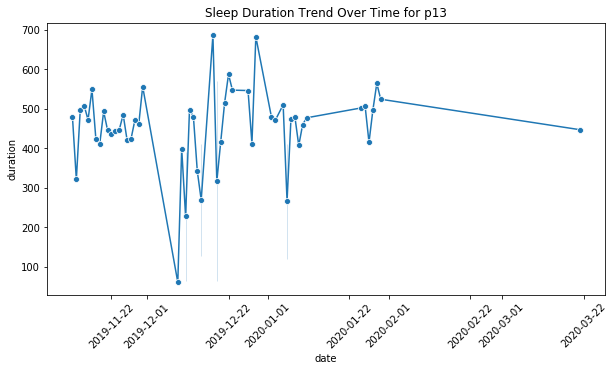

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


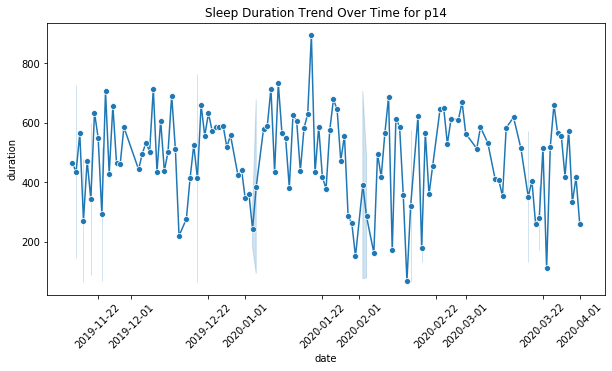

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


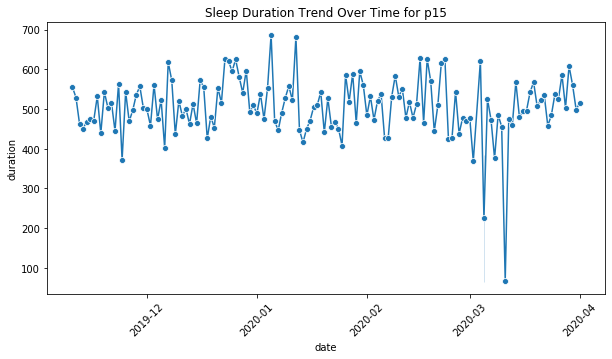

C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


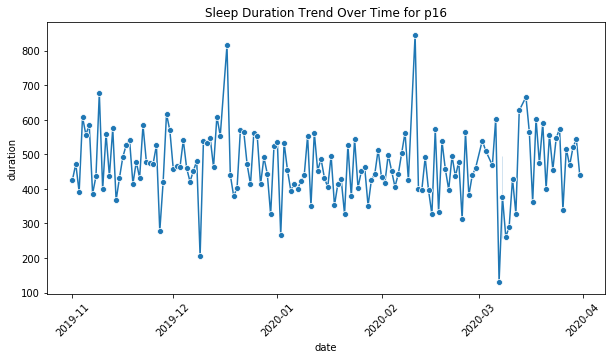

In [16]:
for participant in participants:
    # Filter data for the current participant
    participant_data = sleep_data[sleep_data['participant_id'] == participant]

    # Sort the data by date
    participant_data["date"] = pd.to_datetime(participant_data["date"])
    participant_data.sort_values(by=["date"], inplace=True)

    # Plot sleep duration over time
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=participant_data, x="date", y="duration", marker="o")
    plt.title(f"Sleep Duration Trend Over Time for {participant}")
    plt.xticks(rotation=45)
    plt.show()


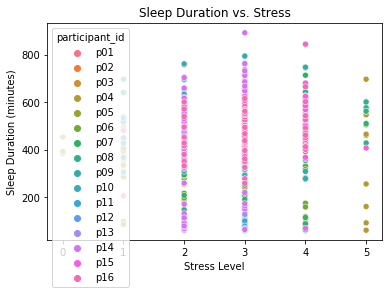

In [17]:
sns.scatterplot(data=merged_df, x="stress", y="duration", hue="participant_id")
plt.title("Sleep Duration vs. Stress")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (minutes)")
plt.show()


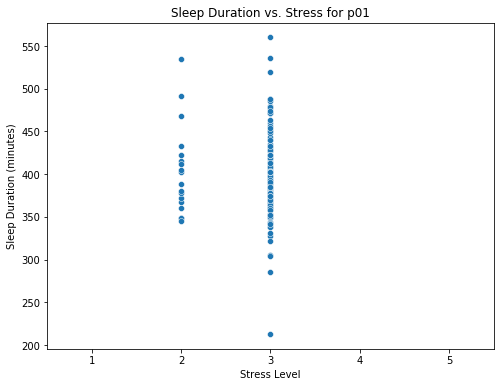

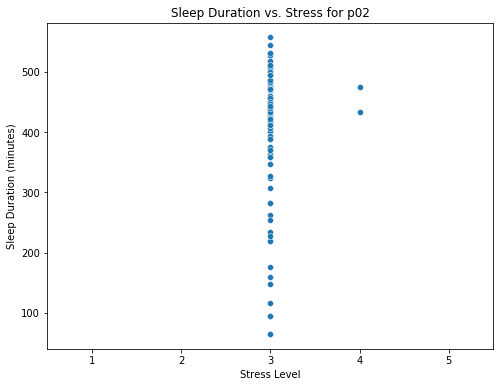

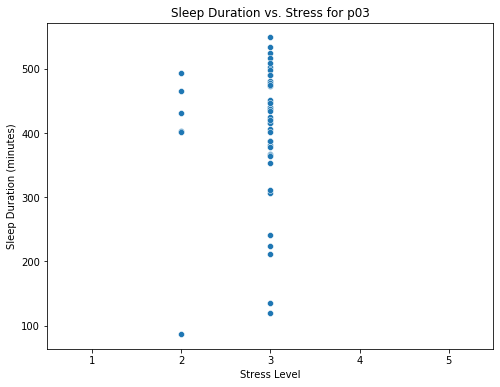

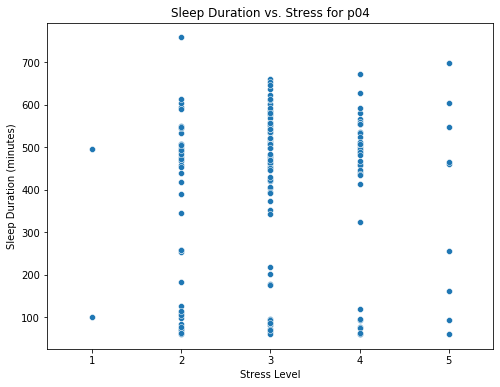

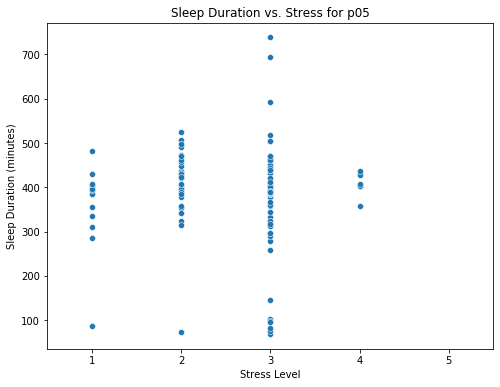

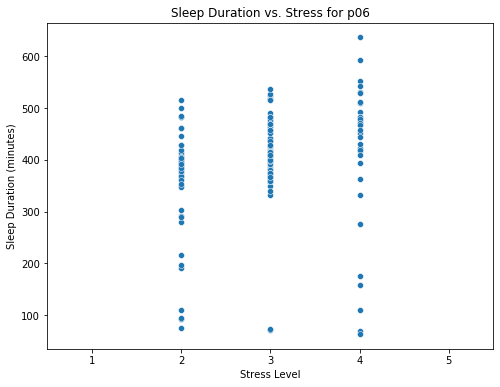

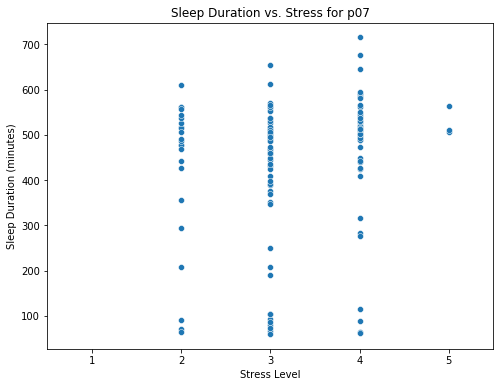

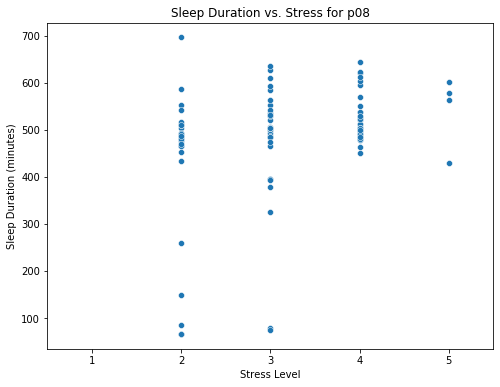

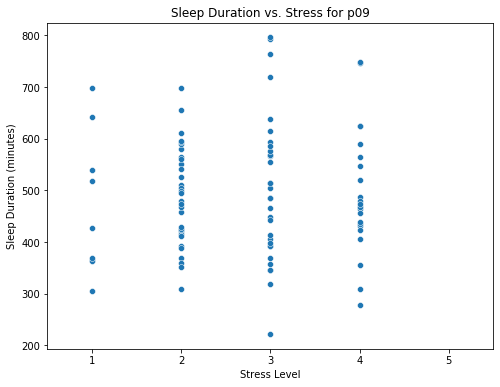

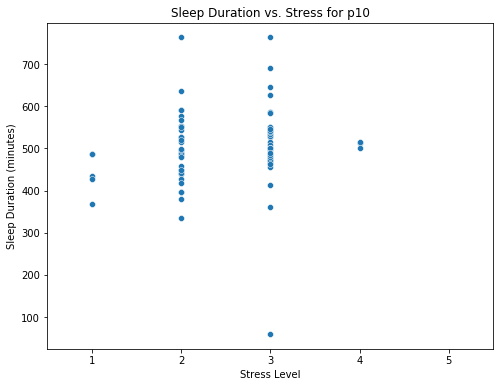

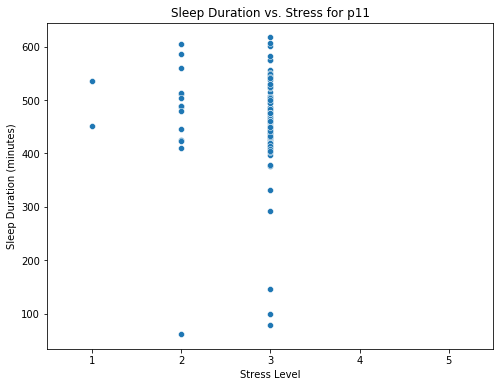

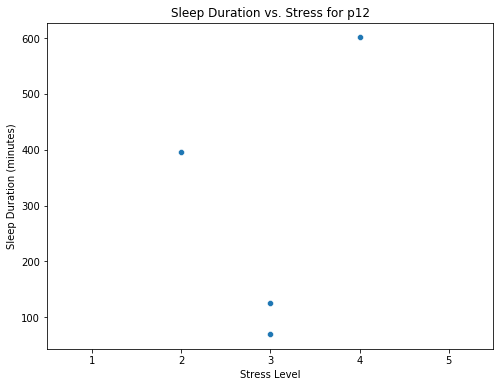

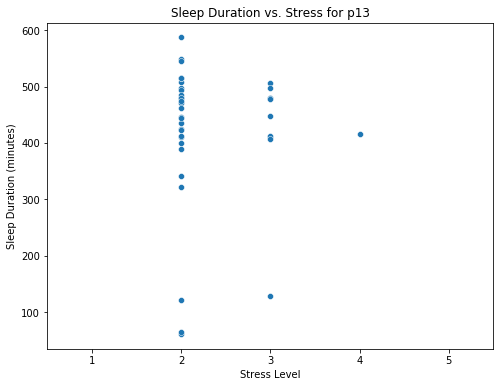

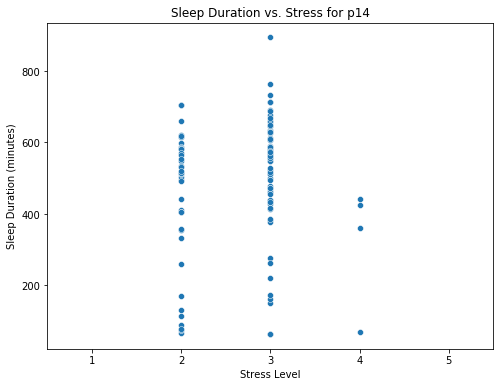

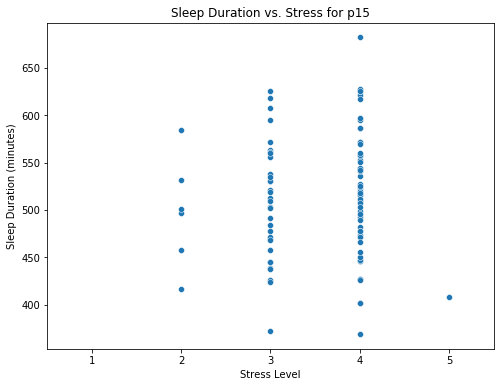

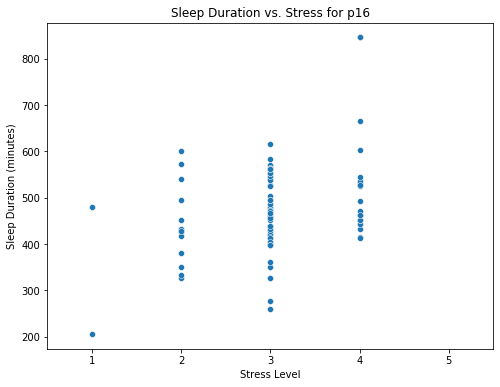

In [18]:
for participant in participants:
    # Filter data for the current participant
    participant_data = merged_df[merged_df['participant_id'] == participant]

    # Plot sleep duration vs stress
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=participant_data, x="stress", y="duration")
    plt.title(f"Sleep Duration vs. Stress for {participant}")
    plt.xlabel("Stress Level")
    plt.ylabel("Sleep Duration (minutes)")
    plt.xlim(0.5,5.5)
    plt.show()

In [19]:
merged_sleep_score_data

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,...,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,participant_id_y
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,430.0,0,378,52,0,430,...,2019-11-02 07:19:30+00:00,24486013387,79,20,22,37,36,53,0.078978,p01
1,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,430.0,0,378,52,0,430,...,2019-11-02 07:40:00+00:00,24490223982,65,17,13,35,59,60,0.087740,p03
2,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,430.0,0,378,52,0,430,...,2019-11-02 05:48:30+00:00,24492529243,73,21,18,34,71,64,0.056836,p05
3,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,430.0,0,378,52,0,430,...,2019-11-02 11:49:00+00:00,24487362288,74,15,21,38,75,65,0.099448,p16
4,24490223982,2019-11-02,2019-11-02 00:36:00,2019-11-02T07:40:00.000,424.0,0,368,56,4,424,...,2019-11-02 07:19:30+00:00,24486013387,79,20,22,37,36,53,0.078978,p01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25747,24473888347,2019-11-01,2019-11-01 00:59:30,2019-11-01T07:28:00.000,388.0,0,291,97,1,388,...,2019-11-01 10:15:00+00:00,24475133162,82,21,23,38,103,63,0.078853,p16
25748,24475133162,2019-11-01,2019-11-01 03:09:00,2019-11-01T10:15:00.000,426.0,0,383,43,0,426,...,2019-11-01 06:29:30+00:00,24472394143,76,18,20,38,27,53,0.053635,p01
25749,24475133162,2019-11-01,2019-11-01 03:09:00,2019-11-01T10:15:00.000,426.0,0,383,43,0,426,...,2019-11-01 06:48:00+00:00,24492529242,84,22,20,42,83,63,0.090815,p05
25750,24475133162,2019-11-01,2019-11-01 03:09:00,2019-11-01T10:15:00.000,426.0,0,383,43,0,426,...,2019-11-01 07:28:00+00:00,24473888347,35,14,18,3,66,59,0.110968,p09


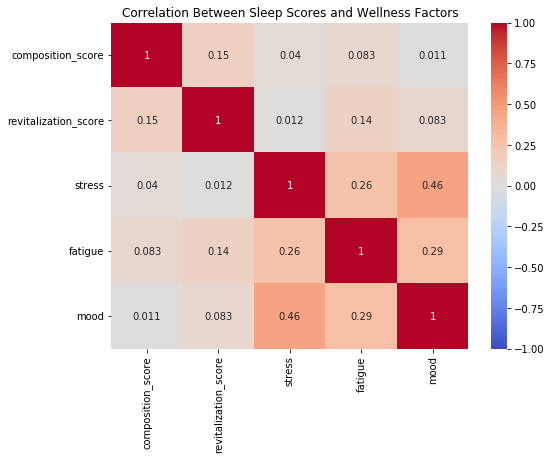

In [20]:
# Merge wellness data
merged_wellness_sleep_score = pd.merge(merged_sleep_score_data, wellness_data, left_on=["participant_id_y","date"], right_on=["participant_id", "date"], how="inner")

# Correlation between sleep score metrics and wellness metrics
correlation_matrix = merged_wellness_sleep_score[["composition_score", "revitalization_score", "stress", "fatigue", "mood"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Sleep Scores and Wellness Factors")
plt.show()


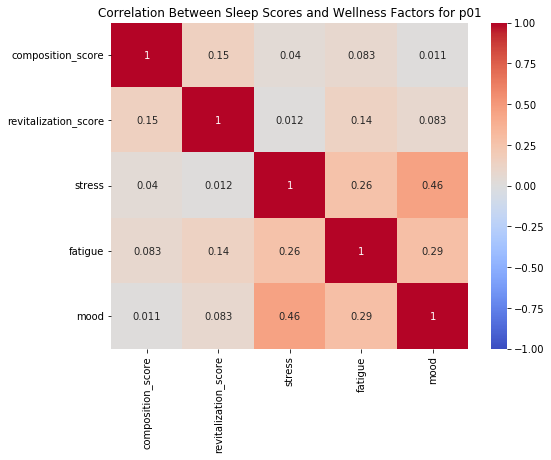

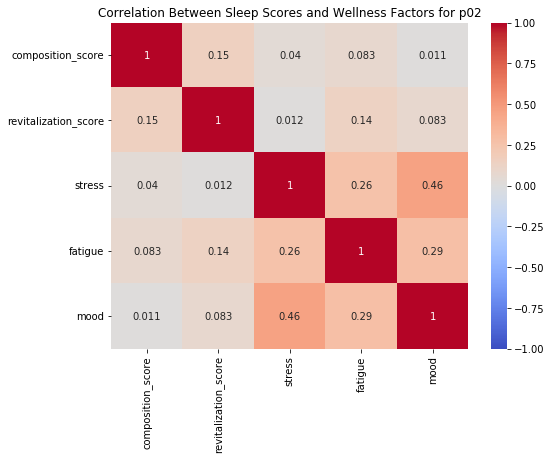

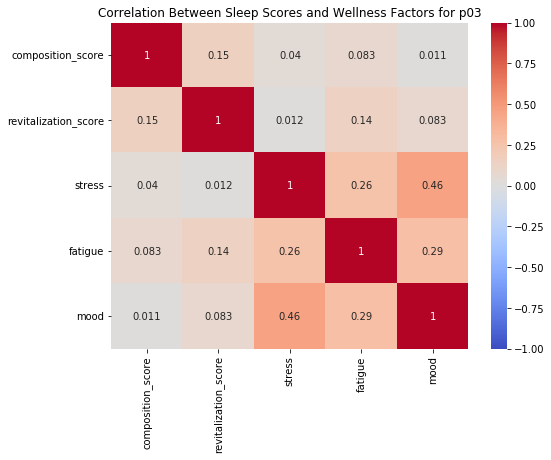

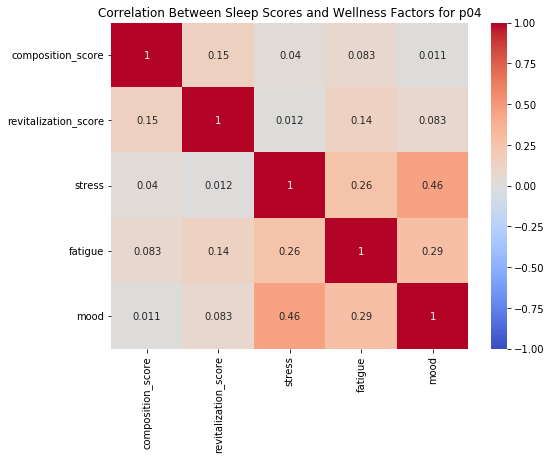

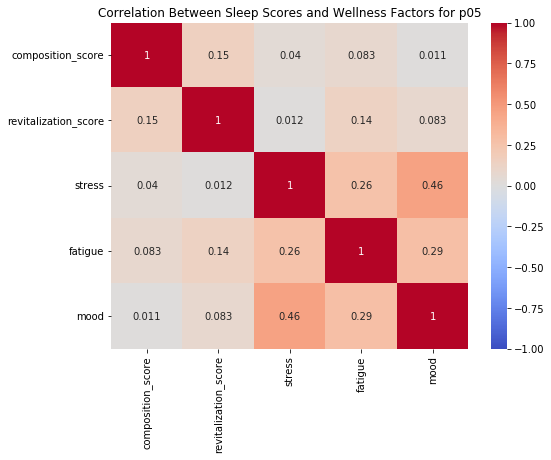

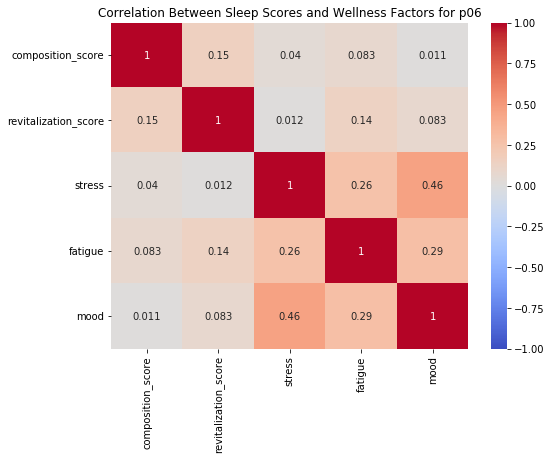

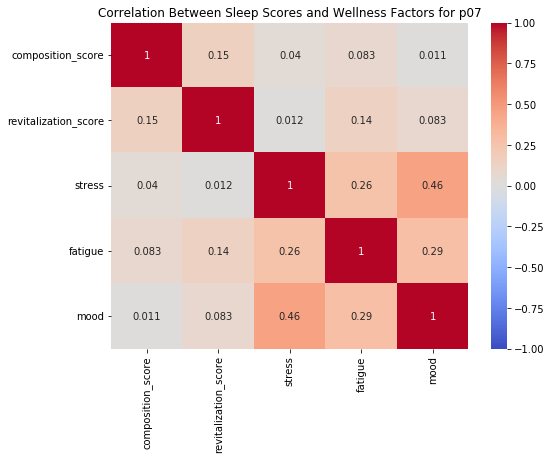

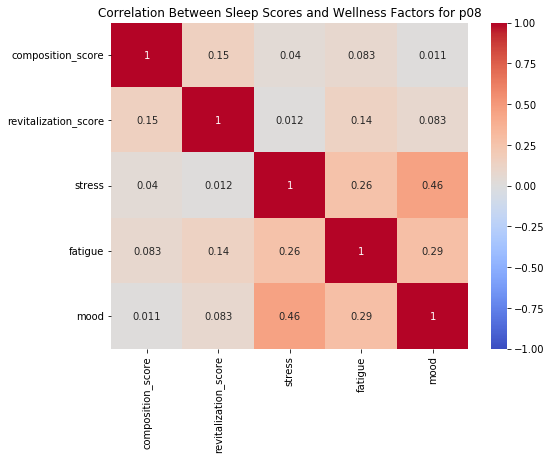

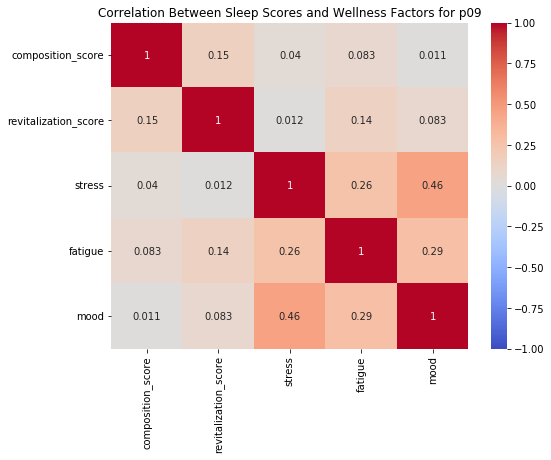

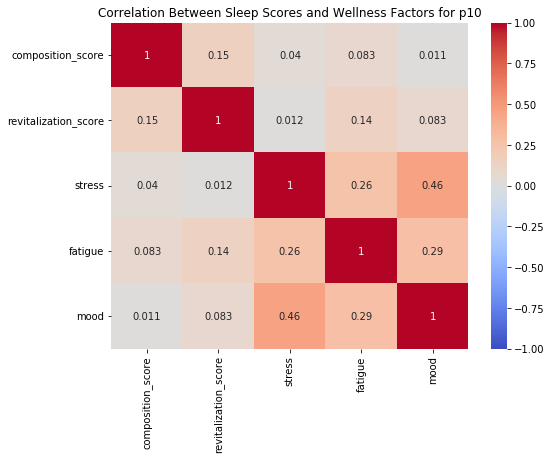

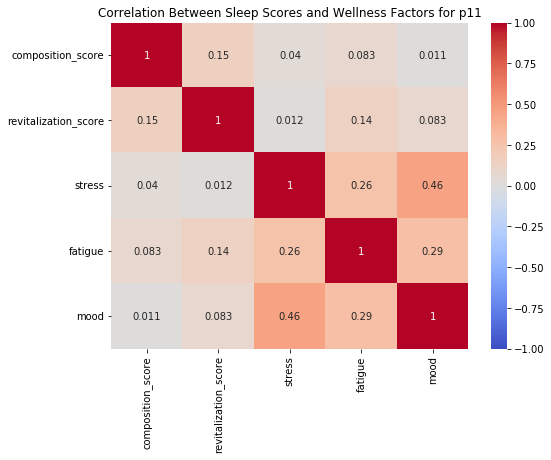

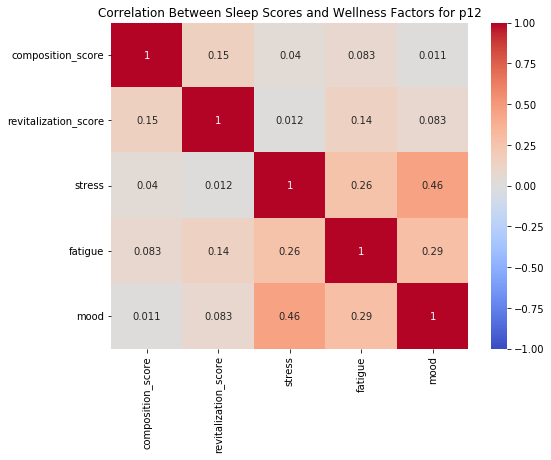

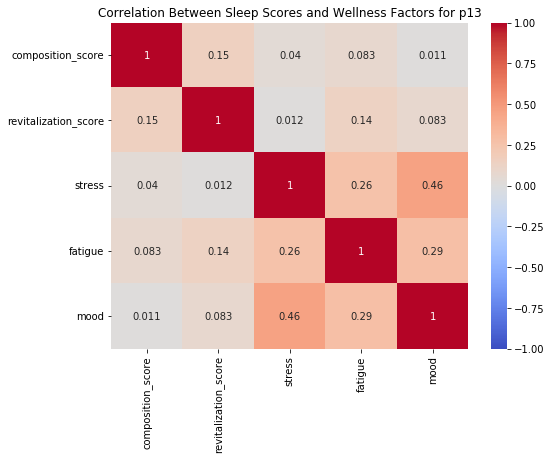

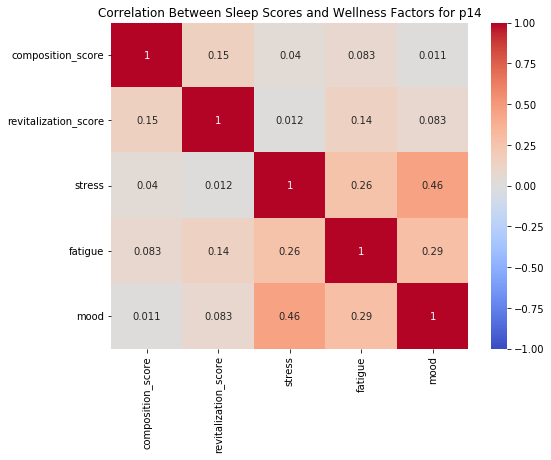

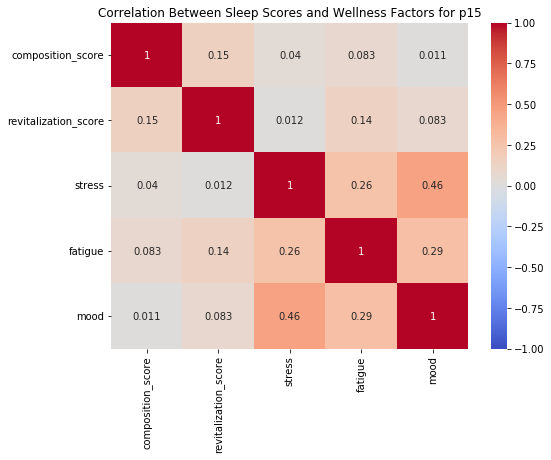

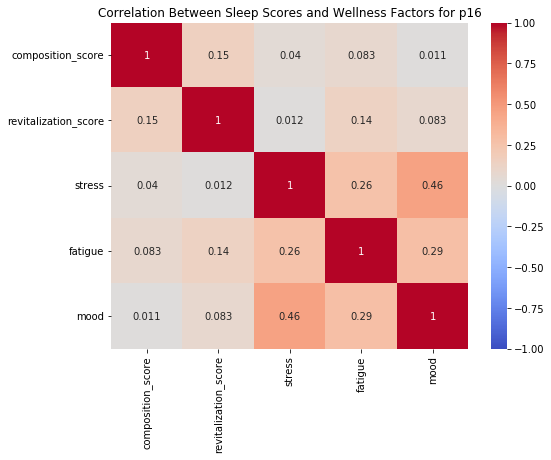

In [21]:
for participant in participants:
    # Filter data for the current participant
    participant_data = merged_wellness_sleep_score[merged_wellness_sleep_score['participant_id'] == participant]
    # Correlation between sleep score metrics and wellness metrics
    correlation_matrix = merged_wellness_sleep_score[["composition_score", "revitalization_score", "stress", "fatigue", "mood"]].corr()

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Correlation Between Sleep Scores and Wellness Factors for {participant}")
    plt.show()
    

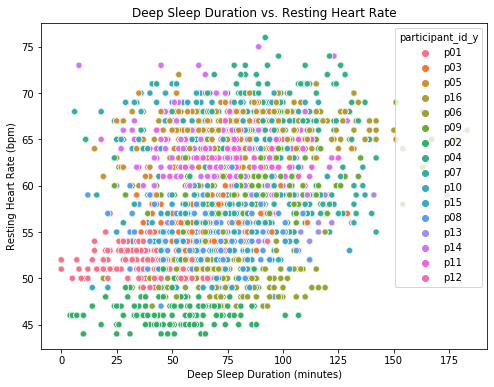

In [28]:
# Deep Sleep vs. Resting Heart Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_sleep_score_data, x="deep_sleep_in_minutes", y="resting_heart_rate", hue="participant_id_y")
plt.title(f"Deep Sleep Duration vs. Resting Heart Rate")
plt.xlabel("Deep Sleep Duration (minutes)")
plt.ylabel("Resting Heart Rate (bpm)")
plt.show()


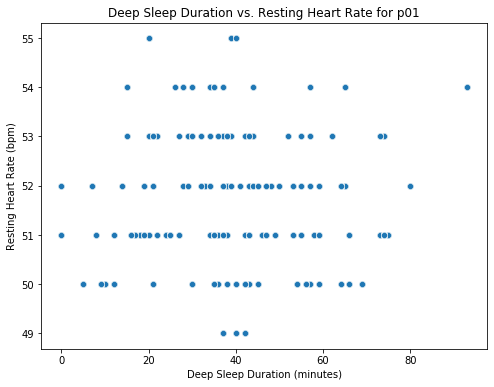

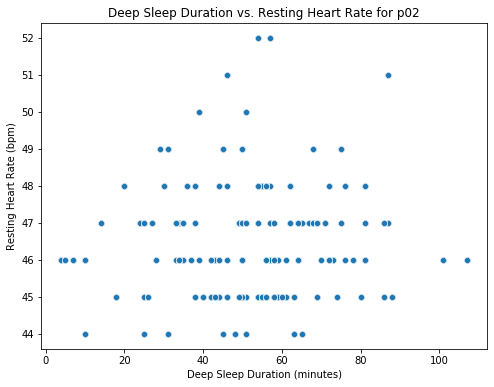

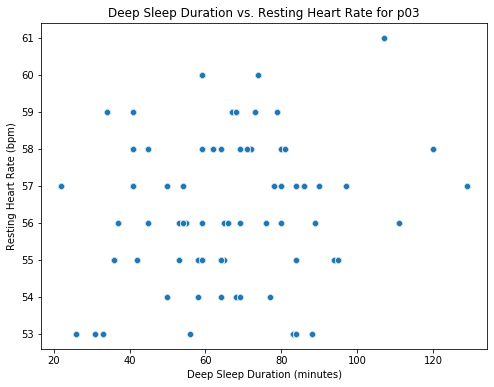

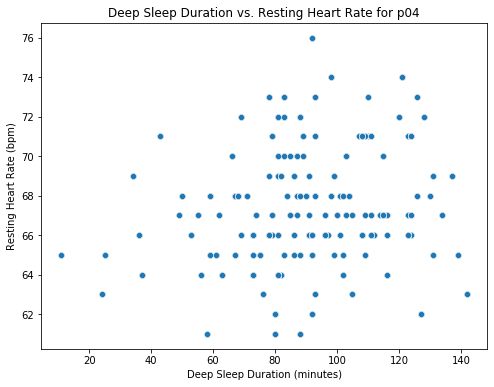

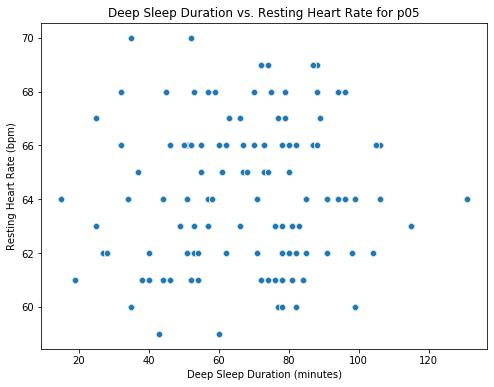

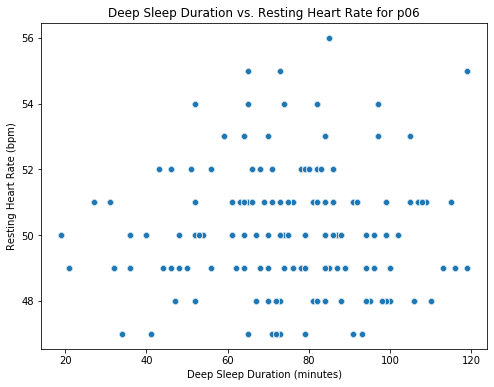

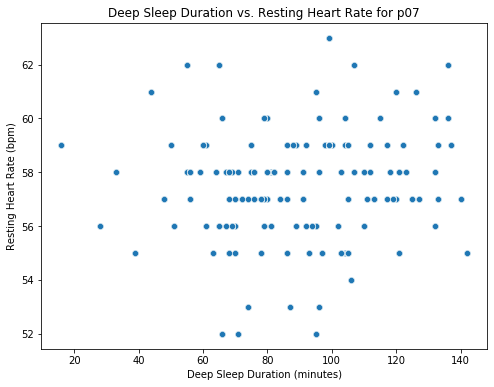

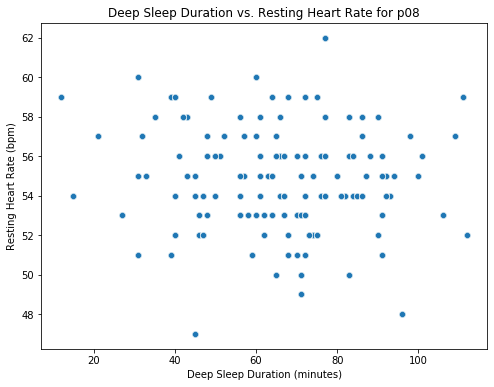

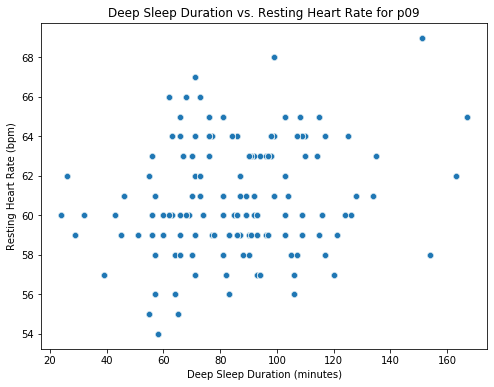

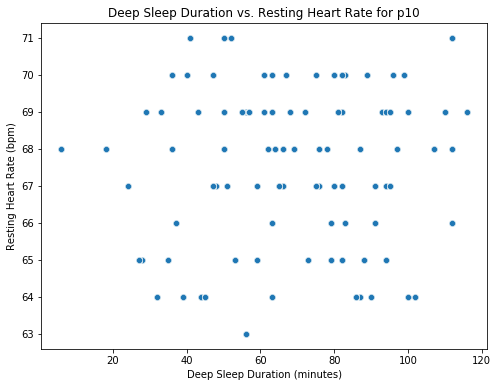

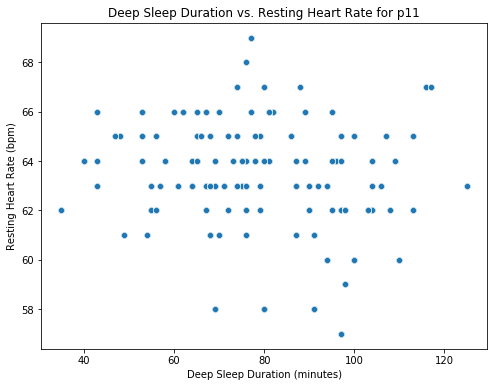

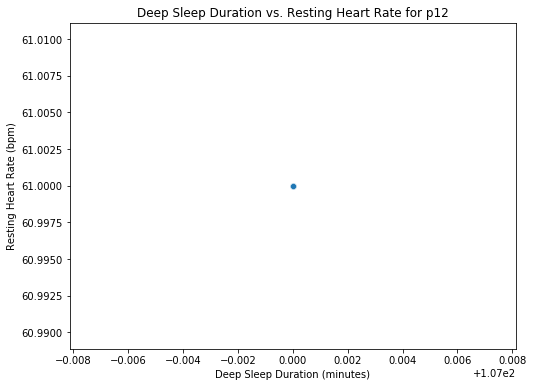

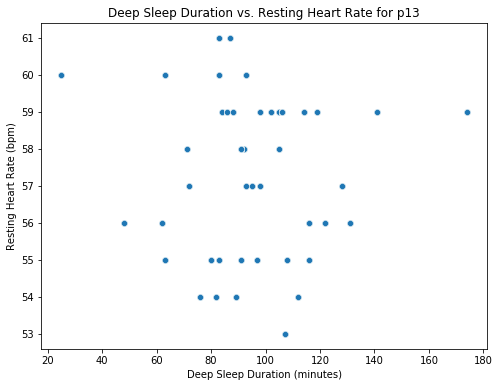

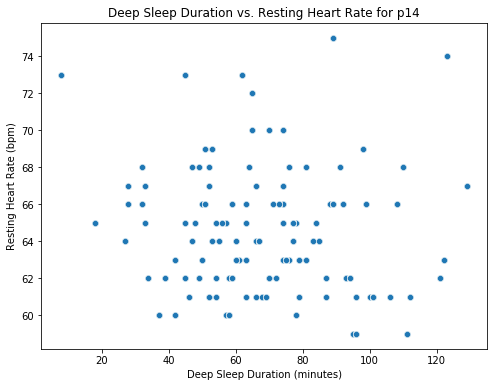

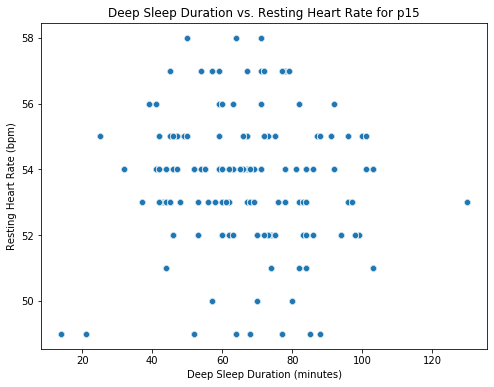

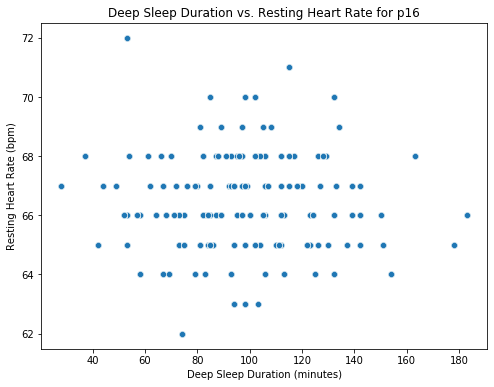

In [29]:
for participant in participants:
    # Filter data for the current participant
    participant_data = merged_sleep_score_data[merged_sleep_score_data['participant_id_y'] == participant]
    # Correlation between sleep score metrics and wellness metrics
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=participant_data, x="deep_sleep_in_minutes", y="resting_heart_rate")
    plt.title(f"Deep Sleep Duration vs. Resting Heart Rate for {participant}")
    plt.xlabel("Deep Sleep Duration (minutes)")
    plt.ylabel("Resting Heart Rate (bpm)")
    plt.show()